<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Sentiment Analysis Model (Problem 1)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
import os
import re
from tensorflow.keras import models

keras:  2.2.4-tf


## Step 1 – Data Loading and Processing

In [2]:
def remove_items(input_text):
    input_text.replace('|', '').replace("'", "").replace('"', '')
    re.sub(' +', ' ', input_text)
    input_text.strip()
    return input_text

### 1.1 Data Loading

In [3]:
# Load the emoji_dictionary
import pandas as pd
df = pd.read_csv('mapping.csv', delimiter=',')
emoji_dictionary = df.loc[:,'emoticons'].to_dict()
print(emoji_dictionary)
print('A total of: ', len(emoji_dictionary), 'Emoji Icons')

{0: '😍', 1: '😂', 2: '📷', 3: '🔥', 4: '❤'}
A total of:  5 Emoji Icons


In [4]:
# load the dataset
dat = pd.read_csv('dataset.csv', delimiter=',')
dat.TEXT = dat.TEXT.apply(remove_items)
texts = dat.loc[:,'TEXT'].values 
labels = dat.loc[:,'Label'].values

In [5]:
# Check the maximum length of texts
max_len = -1
for example in texts:
    if len(example.split()) > max_len:
        max_len = len(example.split())
        
print('the maximum length of the text inputs is ', max_len)

the maximum length of the text inputs is  34


### 1.2 Data Processing


In [6]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 100000
#maxlen = 34

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

def vectorize_sequences(sequences, dimension=5):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

X = pad_sequences(sequences, maxlen=max_len)
y = vectorize_sequences(labels)

print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)


Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546, 5)


### 1.3 Data Sampling

In [7]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
# Refer the report Appendix
# Please enter the random_state assigned to your group

## Step 2 – Develop a Sentiment Analysis Model

### Model #1 (Basic Model)

In [7]:
# Build the Model
model = Sequential()
model.add(Embedding(max_words, 8, input_length=max_len, trainable=True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             800000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               70144     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 938,757
Trainable params: 938,757
Non-trainable params: 0
__________________________________________________

In [8]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/50
213/213 [==============================] - 21s 100ms/step - loss: 1.4538 - acc: 0.4234 - val_loss: 1.4205 - val_acc: 0.4289
Epoch 2/50
213/213 [==============================] - 21s 99ms/step - loss: 1.4238 - acc: 0.4247 - val_loss: 1.4106 - val_acc: 0.4289
Epoch 3/50
213/213 [==============================] - 21s 99ms/step - loss: 1.4054 - acc: 0.4247 - val_loss: 1.3811 - val_acc: 0.4289
Epoch 4/50
213/213 [==============================] - 21s 97ms/step - loss: 1.3503 - acc: 0.4271 - val_loss: 1.3018 - val_acc: 0.4354
Epoch 5/50
213/213 [==============================] - 21s 99ms/step - loss: 1.2706 - acc: 0.4627 - val_loss: 1.2429 - val_acc: 0.4728
Epoch 6/50
213/213 [==============================] - 21s 97ms/step - loss: 1.2178 - acc: 0.4900 - val_loss: 1.2127 - val_acc: 0.4900
Epoch 7/50
213/213 [==============================] - 21s 99ms/step - loss: 1.1773 - acc: 0.5059 - val_loss: 1.1837 - val_acc: 0.5018
Epoch 8/50
213/213 [==============================] - 21s 98m

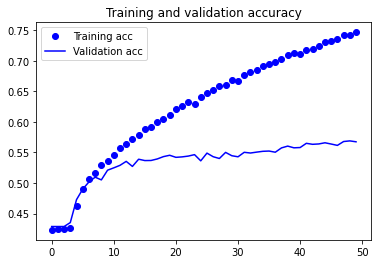

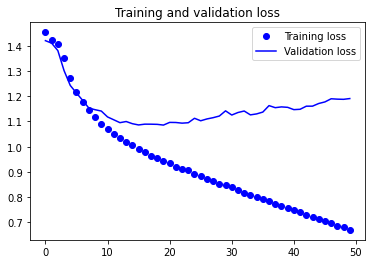

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #1.2 (Basic Model)

In [13]:
# Build the Model
model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(LSTM(1024, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 8)             800000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 34, 1024)          4231168   
_________________________________________________________________
flatten_2 (Flatten)          (None, 34816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1114144   
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 6,145,477
Trainable params: 6,145,477
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the Model

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/30
426/426 [==============================] - 7s 16ms/step - loss: 1.4335 - acc: 0.4238 - val_loss: 1.4206 - val_acc: 0.4336
Epoch 2/30
426/426 [==============================] - 6s 15ms/step - loss: 1.2455 - acc: 0.4750 - val_loss: 1.1745 - val_acc: 0.5048
Epoch 3/30
426/426 [==============================] - 6s 15ms/step - loss: 1.0766 - acc: 0.5480 - val_loss: 1.1127 - val_acc: 0.5314
Epoch 4/30
426/426 [==============================] - 6s 15ms/step - loss: 0.9735 - acc: 0.5988 - val_loss: 1.1052 - val_acc: 0.5360
Epoch 5/30
426/426 [==============================] - 6s 15ms/step - loss: 0.8874 - acc: 0.6469 - val_loss: 1.1104 - val_acc: 0.5447
Epoch 6/30
426/426 [==============================] - 6s 15ms/step - loss: 0.8021 - acc: 0.6904 - val_loss: 1.1463 - val_acc: 0.5442
Epoch 7/30
426/426 [==============================] - 6s 15ms/step - loss: 0.7261 - acc: 0.7260 - val_loss: 1.2523 - val_acc: 0.5588
Epoch 8/30
426/426 [==============================] - 6s 15ms/step - 

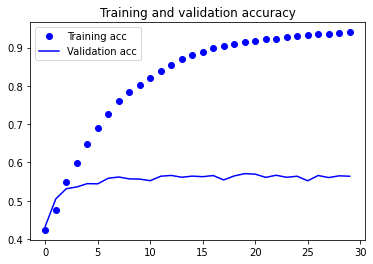

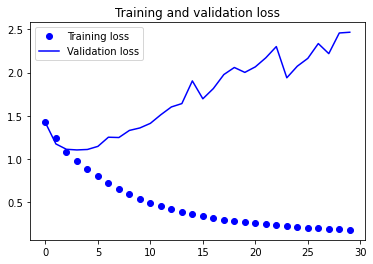

In [15]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #1.3 (Basic Model -> Adam)

In [88]:
# Build the Model
model = Sequential()
model.add(layers.Embedding(max_words, 100, input_length=max_len))
model.add(GRU(1024, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 34, 100)           10000000  
_________________________________________________________________
gru_16 (GRU)                 (None, 34, 1024)          3459072   
_________________________________________________________________
flatten_31 (Flatten)         (None, 34816)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1114144   
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 165       
Total params: 14,573,381
Trainable params: 14,573,381
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
213/213 [==============================] - 21s 100ms/step - loss: 1.3473 - acc: 0.4353 - val_loss: 1.1980 - val_acc: 0.4846
Epoch 2/20
213/213 [==============================] - 21s 100ms/step - loss: 1.1318 - acc: 0.5118 - val_loss: 1.1371 - val_acc: 0.5115
Epoch 3/20
213/213 [==============================] - 21s 100ms/step - loss: 1.0414 - acc: 0.5556 - val_loss: 1.0859 - val_acc: 0.5400
Epoch 4/20
213/213 [==============================] - 21s 101ms/step - loss: 0.9717 - acc: 0.5923 - val_loss: 1.0582 - val_acc: 0.5430
Epoch 5/20
213/213 [==============================] - 21s 100ms/step - loss: 0.9085 - acc: 0.6286 - val_loss: 1.0599 - val_acc: 0.5605
Epoch 6/20
213/213 [==============================] - 21s 101ms/step - loss: 0.8496 - acc: 0.6671 - val_loss: 1.0628 - val_acc: 0.5630
Epoch 7/20
213/213 [==============================] - 21s 100ms/step - loss: 0.7946 - acc: 0.6991 - val_loss: 1.0924 - val_acc: 0.5717
Epoch 8/20
213/213 [==============================] - 2

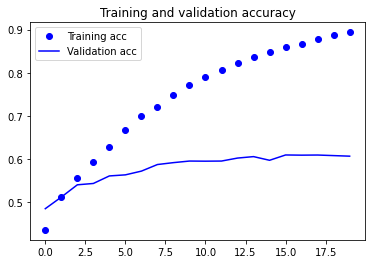

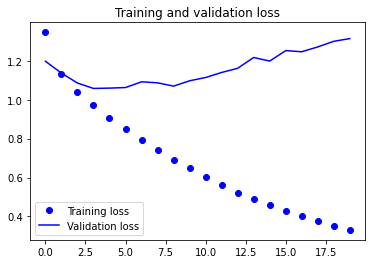

In [90]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [91]:
# Save the Model
model.save('basic_GRU.h5')

### Model #1.4 (Basic Model -> Bidirectional)

In [79]:
# Build the Model
model = Sequential()
model.add(layers.Embedding(max_words, 100, input_length=max_len))
model.add(GRU(128, return_sequences=True))
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.001))))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 34, 100)           10000000  
_________________________________________________________________
gru_13 (GRU)                 (None, 34, 128)           88320     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 34, 128)           74496     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 34, 128)           74496     
_________________________________________________________________
flatten_30 (Flatten)         (None, 4352)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                139296    
_________________________________________________________________
dense_27 (Dense)             (None, 5)                

In [80]:
# Train the Model

model.compile(optimizer=RMSprop(lr=5e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
213/213 [==============================] - 22s 104ms/step - loss: 1.7157 - acc: 0.4237 - val_loss: 1.6594 - val_acc: 0.4289
Epoch 2/20
213/213 [==============================] - 21s 99ms/step - loss: 1.5694 - acc: 0.4405 - val_loss: 1.4559 - val_acc: 0.4694
Epoch 3/20
213/213 [==============================] - 21s 100ms/step - loss: 1.3759 - acc: 0.4933 - val_loss: 1.3454 - val_acc: 0.4982
Epoch 4/20
213/213 [==============================] - 21s 99ms/step - loss: 1.2756 - acc: 0.5187 - val_loss: 1.2917 - val_acc: 0.5018
Epoch 5/20
213/213 [==============================] - 21s 101ms/step - loss: 1.2034 - acc: 0.5356 - val_loss: 1.2465 - val_acc: 0.5095
Epoch 6/20
213/213 [==============================] - 21s 100ms/step - loss: 1.1459 - acc: 0.5505 - val_loss: 1.2090 - val_acc: 0.5138
Epoch 7/20
213/213 [==============================] - 21s 100ms/step - loss: 1.0960 - acc: 0.5675 - val_loss: 1.2105 - val_acc: 0.5163
Epoch 8/20
213/213 [==============================] - 22s

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.1 (GLOVE.Twitter)

In [21]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [14]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_2 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                108832    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 100)           10000000  
____________________

In [15]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
213/213 [==============================] - 18s 85ms/step - loss: 1.1901 - acc: 0.5244 - val_loss: 1.0740 - val_acc: 0.5748
Epoch 2/20
213/213 [==============================] - 18s 86ms/step - loss: 0.9383 - acc: 0.6359 - val_loss: 0.9997 - val_acc: 0.6049
Epoch 3/20
213/213 [==============================] - 18s 86ms/step - loss: 0.7749 - acc: 0.7020 - val_loss: 0.9797 - val_acc: 0.6144
Epoch 4/20
213/213 [==============================] - 18s 85ms/step - loss: 0.6430 - acc: 0.7630 - val_loss: 0.9828 - val_acc: 0.6251
Epoch 5/20
213/213 [==============================] - 18s 85ms/step - loss: 0.5250 - acc: 0.8126 - val_loss: 1.0222 - val_acc: 0.6323
Epoch 6/20
213/213 [==============================] - 18s 86ms/step - loss: 0.4226 - acc: 0.8547 - val_loss: 1.0691 - val_acc: 0.6409
Epoch 7/20
213/213 [==============================] - 18s 85ms/step - loss: 0.3302 - acc: 0.8905 - val_loss: 1.1327 - val_acc: 0.6410
Epoch 8/20
213/213 [==============================] - 18s 85ms

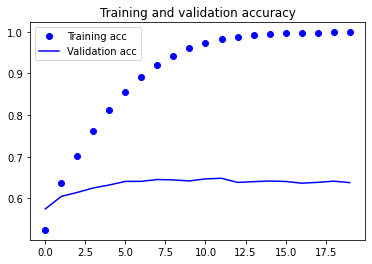

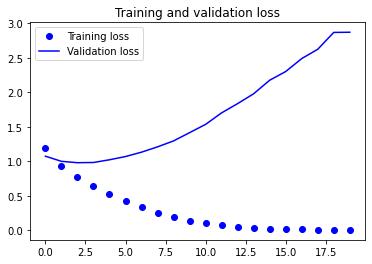

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('text_model_1.h5')

### Model #2.2 (GLOVE.Twitter, batch size = 64)

In [17]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2/glove.twitter.27B.200d.txt'

In [18]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_3 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                108832    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 100)           10000000  
____________________

In [19]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/20
426/426 [==============================] - 36s 86ms/step - loss: 1.3463 - acc: 0.4438 - val_loss: 1.2551 - val_acc: 0.4952
Epoch 2/20
426/426 [==============================] - 37s 86ms/step - loss: 1.1934 - acc: 0.5231 - val_loss: 1.1766 - val_acc: 0.5326
Epoch 3/20
426/426 [==============================] - 36s 86ms/step - loss: 1.1143 - acc: 0.5589 - val_loss: 1.1284 - val_acc: 0.5557
Epoch 4/20
426/426 [==============================] - 36s 85ms/step - loss: 1.0579 - acc: 0.5840 - val_loss: 1.1014 - val_acc: 0.5601
Epoch 5/20
426/426 [==============================] - 37s 86ms/step - loss: 1.0121 - acc: 0.6031 - val_loss: 1.0740 - val_acc: 0.5765
Epoch 6/20
426/426 [==============================] - 36s 85ms/step - loss: 0.9733 - acc: 0.6205 - val_loss: 1.0537 - val_acc: 0.5828
Epoch 7/20
426/426 [==============================] - 37s 86ms/step - loss: 0.9383 - acc: 0.6346 - val_loss: 1.0380 - val_acc: 0.5903
Epoch 8/20
426/426 [==============================] - 36s 85ms

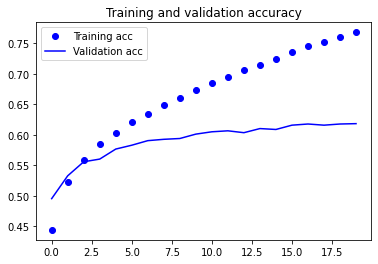

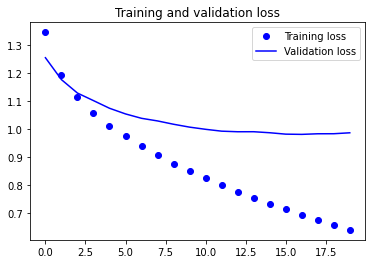

In [20]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.3 (GLOVE.Twitter, batch size = 64, Optimizer = Adam)

In [29]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [21]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_4 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                108832    
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 34, 100)           10000000  
____________________

In [22]:
# Train the Model
model.compile(optimizer=Adam(lr=5e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
213/213 [==============================] - 22s 102ms/step - loss: 1.2653 - acc: 0.4893 - val_loss: 1.1146 - val_acc: 0.5642
Epoch 2/20
213/213 [==============================] - 21s 101ms/step - loss: 1.0049 - acc: 0.6114 - val_loss: 1.0261 - val_acc: 0.5964
Epoch 3/20
213/213 [==============================] - 22s 101ms/step - loss: 0.8318 - acc: 0.6861 - val_loss: 0.9752 - val_acc: 0.6165
Epoch 4/20
213/213 [==============================] - 22s 101ms/step - loss: 0.6734 - acc: 0.7596 - val_loss: 0.9607 - val_acc: 0.6323
Epoch 5/20
213/213 [==============================] - 22s 102ms/step - loss: 0.5269 - acc: 0.8241 - val_loss: 0.9700 - val_acc: 0.6356
Epoch 6/20
213/213 [==============================] - 22s 102ms/step - loss: 0.3948 - acc: 0.8774 - val_loss: 1.0074 - val_acc: 0.6459
Epoch 7/20
213/213 [==============================] - 22s 101ms/step - loss: 0.2865 - acc: 0.9175 - val_loss: 1.0525 - val_acc: 0.6464
Epoch 8/20
213/213 [==============================] - 2

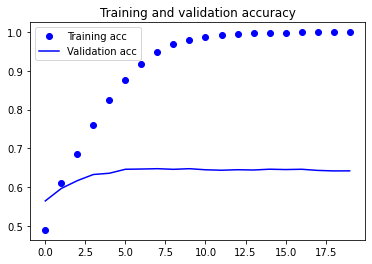

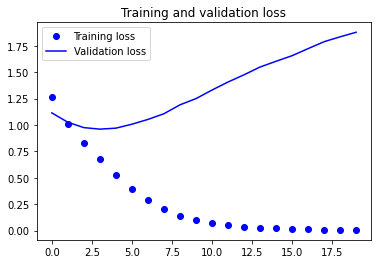

In [23]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.4 (Basic Model + GLOVE.Twitter, batch size = 32, optimizer = Adam)

In [33]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [24]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_5 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                108832    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 34, 100)           10000000  
____________________

In [25]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/15
851/851 [==============================] - 85s 100ms/step - loss: 1.3367 - acc: 0.4505 - val_loss: 1.2152 - val_acc: 0.5137
Epoch 2/15
851/851 [==============================] - 85s 100ms/step - loss: 1.1328 - acc: 0.5477 - val_loss: 1.1168 - val_acc: 0.5582
Epoch 3/15
851/851 [==============================] - 85s 100ms/step - loss: 1.0248 - acc: 0.6003 - val_loss: 1.0663 - val_acc: 0.5759
Epoch 4/15
851/851 [==============================] - 85s 100ms/step - loss: 0.9415 - acc: 0.6388 - val_loss: 1.0305 - val_acc: 0.5893
Epoch 5/15
851/851 [==============================] - 86s 101ms/step - loss: 0.8679 - acc: 0.6721 - val_loss: 1.0069 - val_acc: 0.5974
Epoch 6/15
851/851 [==============================] - 85s 100ms/step - loss: 0.8024 - acc: 0.6984 - val_loss: 0.9873 - val_acc: 0.6100
Epoch 7/15
851/851 [==============================] - 86s 101ms/step - loss: 0.7403 - acc: 0.7285 - val_loss: 0.9772 - val_acc: 0.6171
Epoch 8/15
851/851 [==============================] - 8

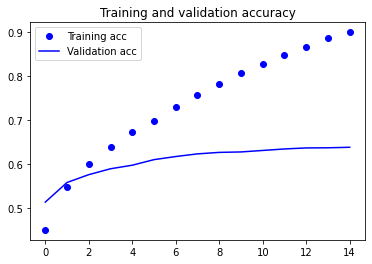

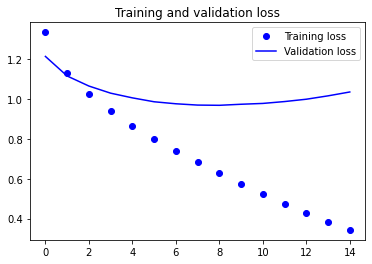

In [26]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.5 (Basic Model + GLOVE.Twitter, batch size = 128, optimizer = SGD)

In [37]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [27]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_6 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                108832    
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 34, 100)           10000000  
____________________

In [28]:
# Train the Model
model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 1s 6ms/step - loss: 1.4364 - acc: 0.4107 - val_loss: 1.3682 - val_acc: 0.4509
Epoch 2/30
213/213 [==============================] - 1s 5ms/step - loss: 1.3320 - acc: 0.4600 - val_loss: 1.2965 - val_acc: 0.4828
Epoch 3/30
213/213 [==============================] - 1s 5ms/step - loss: 1.2684 - acc: 0.4905 - val_loss: 1.2521 - val_acc: 0.5116
Epoch 4/30
213/213 [==============================] - 1s 5ms/step - loss: 1.2217 - acc: 0.5114 - val_loss: 1.2162 - val_acc: 0.5207
Epoch 5/30
213/213 [==============================] - 1s 5ms/step - loss: 1.1856 - acc: 0.5272 - val_loss: 1.1907 - val_acc: 0.5314
Epoch 6/30
213/213 [==============================] - 1s 5ms/step - loss: 1.1575 - acc: 0.5379 - val_loss: 1.1720 - val_acc: 0.5360
Epoch 7/30
213/213 [==============================] - 1s 5ms/step - loss: 1.1332 - acc: 0.5513 - val_loss: 1.1620 - val_acc: 0.5405
Epoch 8/30
213/213 [==============================] - 1s 5ms/step - loss: 1.

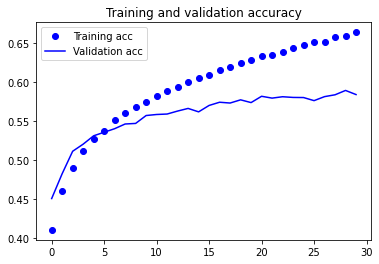

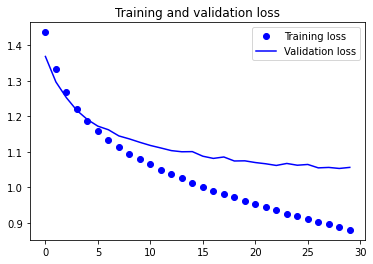

In [29]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.6 (Basic Model + GLOVE.Twitter (Non-trainable), batch size = 128, optimizer = SGD)

In [45]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [30]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_7 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                108832    
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 34, 100)           10000000  
____________________

In [31]:
# Train the Model
model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 1s 4ms/step - loss: 1.4141 - acc: 0.4196 - val_loss: 1.3530 - val_acc: 0.4556
Epoch 2/30
213/213 [==============================] - 1s 4ms/step - loss: 1.3197 - acc: 0.4646 - val_loss: 1.2907 - val_acc: 0.4796
Epoch 3/30
213/213 [==============================] - 1s 4ms/step - loss: 1.2632 - acc: 0.4942 - val_loss: 1.2512 - val_acc: 0.5037
Epoch 4/30
213/213 [==============================] - 1s 4ms/step - loss: 1.2253 - acc: 0.5133 - val_loss: 1.2247 - val_acc: 0.5138
Epoch 5/30
213/213 [==============================] - 1s 4ms/step - loss: 1.1946 - acc: 0.5274 - val_loss: 1.2067 - val_acc: 0.5238
Epoch 6/30
213/213 [==============================] - 1s 4ms/step - loss: 1.1710 - acc: 0.5392 - val_loss: 1.1942 - val_acc: 0.5260
Epoch 7/30
213/213 [==============================] - 1s 3ms/step - loss: 1.1505 - acc: 0.5462 - val_loss: 1.1787 - val_acc: 0.5354
Epoch 8/30
213/213 [==============================] - 1s 4ms/step - loss: 1.

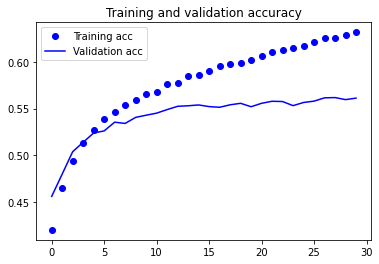

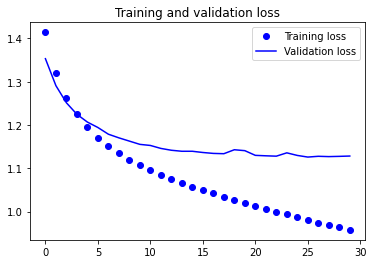

In [32]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.7 (Basic Model + LSTM + GLOVE.Twitter, batch size = 128, optimizer = SGD)

In [49]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [19]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
lstm_3 (LSTM)                (None, 34, 64)            42240     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2176)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                69664     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 10,112,069
Trainable params: 10,112,069
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)        

In [20]:
# Train the Model
model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/40
213/213 [==============================] - 2s 11ms/step - loss: 1.4495 - acc: 0.4227 - val_loss: 1.4016 - val_acc: 0.4282
Epoch 2/40
213/213 [==============================] - 2s 9ms/step - loss: 1.3896 - acc: 0.4284 - val_loss: 1.3666 - val_acc: 0.4338
Epoch 3/40
213/213 [==============================] - 2s 10ms/step - loss: 1.3501 - acc: 0.4432 - val_loss: 1.3220 - val_acc: 0.4646
Epoch 4/40
213/213 [==============================] - 2s 10ms/step - loss: 1.3056 - acc: 0.4656 - val_loss: 1.2782 - val_acc: 0.4791
Epoch 5/40
213/213 [==============================] - 2s 9ms/step - loss: 1.2711 - acc: 0.4840 - val_loss: 1.2466 - val_acc: 0.4988
Epoch 6/40
213/213 [==============================] - 2s 10ms/step - loss: 1.2415 - acc: 0.4988 - val_loss: 1.2188 - val_acc: 0.5131
Epoch 7/40
213/213 [==============================] - 2s 10ms/step - loss: 1.2172 - acc: 0.5142 - val_loss: 1.1995 - val_acc: 0.5276
Epoch 8/40
213/213 [==============================] - 2s 10ms/step - lo

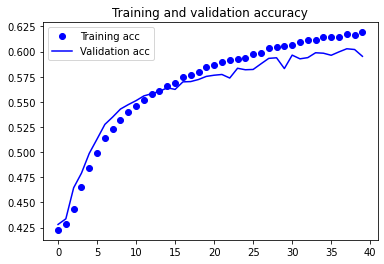

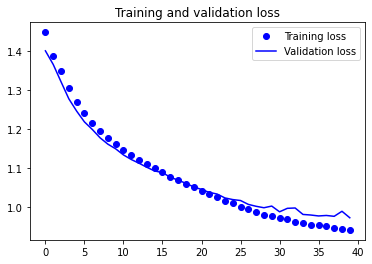

In [21]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.8 (Basic Model + LSTM + GLOVE.Twitter, batch size = 128, optimizer = SGD, regularizer implemented)

In [10]:
glove_dir = ''

embeddings_index = {}
f = open('glove.twitter.27B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [37]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_5 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               680200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 1005      
Total params: 10,681,205
Trainable params: 10,681,205
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)        

In [38]:
# Train the Model
model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/200
213/213 [==============================] - 1s 6ms/step - loss: 1.8380 - acc: 0.3877 - val_loss: 1.7357 - val_acc: 0.4368
Epoch 2/200
213/213 [==============================] - 1s 5ms/step - loss: 1.7368 - acc: 0.4430 - val_loss: 1.6789 - val_acc: 0.4661
Epoch 3/200
213/213 [==============================] - 1s 6ms/step - loss: 1.6866 - acc: 0.4643 - val_loss: 1.6382 - val_acc: 0.4974
Epoch 4/200
213/213 [==============================] - 1s 6ms/step - loss: 1.6436 - acc: 0.4843 - val_loss: 1.6029 - val_acc: 0.5079
Epoch 5/200
213/213 [==============================] - 1s 5ms/step - loss: 1.6117 - acc: 0.4990 - val_loss: 1.5786 - val_acc: 0.5140
Epoch 6/200
213/213 [==============================] - 1s 5ms/step - loss: 1.5888 - acc: 0.5079 - val_loss: 1.5585 - val_acc: 0.5273
Epoch 7/200
213/213 [==============================] - 1s 5ms/step - loss: 1.5623 - acc: 0.5168 - val_loss: 1.5404 - val_acc: 0.5322
Epoch 8/200
213/213 [==============================] - 1s 5ms/step - 

213/213 [==============================] - 1s 6ms/step - loss: 0.6345 - acc: 0.8615 - val_loss: 1.1592 - val_acc: 0.6478
Epoch 124/200
213/213 [==============================] - 1s 5ms/step - loss: 0.6284 - acc: 0.8635 - val_loss: 1.1598 - val_acc: 0.6488
Epoch 125/200
213/213 [==============================] - 1s 5ms/step - loss: 0.6255 - acc: 0.8648 - val_loss: 1.1600 - val_acc: 0.6472
Epoch 126/200
213/213 [==============================] - 1s 5ms/step - loss: 0.6212 - acc: 0.8662 - val_loss: 1.1598 - val_acc: 0.6485
Epoch 127/200
213/213 [==============================] - 1s 5ms/step - loss: 0.6208 - acc: 0.8656 - val_loss: 1.1670 - val_acc: 0.6509
Epoch 128/200
213/213 [==============================] - 1s 5ms/step - loss: 0.6173 - acc: 0.8658 - val_loss: 1.1606 - val_acc: 0.6497
Epoch 129/200
213/213 [==============================] - 1s 5ms/step - loss: 0.6101 - acc: 0.8670 - val_loss: 1.1617 - val_acc: 0.6484
Epoch 130/200
213/213 [==============================] - 1s 5ms/step 

Epoch 184/200
213/213 [==============================] - 1s 6ms/step - loss: 0.4669 - acc: 0.9165 - val_loss: 1.1581 - val_acc: 0.6553
Epoch 185/200
213/213 [==============================] - 1s 6ms/step - loss: 0.4663 - acc: 0.9153 - val_loss: 1.1489 - val_acc: 0.6541
Epoch 186/200
213/213 [==============================] - 1s 5ms/step - loss: 0.4654 - acc: 0.9172 - val_loss: 1.1572 - val_acc: 0.6538
Epoch 187/200
213/213 [==============================] - 1s 5ms/step - loss: 0.4644 - acc: 0.9146 - val_loss: 1.1649 - val_acc: 0.6589
Epoch 188/200
213/213 [==============================] - 1s 5ms/step - loss: 0.4622 - acc: 0.9175 - val_loss: 1.1534 - val_acc: 0.6554
Epoch 189/200
213/213 [==============================] - 1s 6ms/step - loss: 0.4574 - acc: 0.9195 - val_loss: 1.1581 - val_acc: 0.6541
Epoch 190/200
213/213 [==============================] - 1s 5ms/step - loss: 0.4576 - acc: 0.9189 - val_loss: 1.1580 - val_acc: 0.6542
Epoch 191/200
213/213 [==============================] 

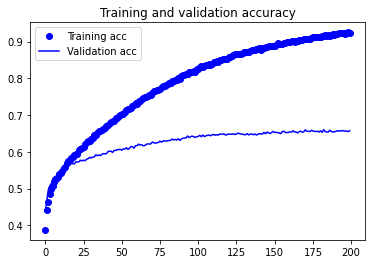

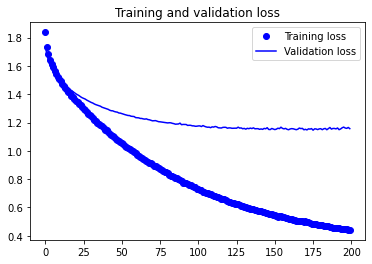

In [39]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.9 (Basic Model + LSTM + GLOVE.Twitter, batch size = 128, optimizer = SGD, regularizer implemented)

In [18]:
glove_dir = ''

embeddings_index = {}
f = open('glove.twitter.27B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [45]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(1024, return_sequences=True))
model.add(Flatten())
model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
lstm_6 (LSTM)                (None, 34, 1024)          4608000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 34816)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               6963400   
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 1005      
Total params: 21,572,405
Trainable params: 21,572,405
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
Layer (type)        

In [46]:
# Train the Model
model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 5s 23ms/step - loss: 1.8182 - acc: 0.4254 - val_loss: 1.7574 - val_acc: 0.4358
Epoch 2/30
213/213 [==============================] - 5s 21ms/step - loss: 1.7187 - acc: 0.4513 - val_loss: 1.6737 - val_acc: 0.4631
Epoch 3/30
213/213 [==============================] - 5s 21ms/step - loss: 1.6431 - acc: 0.4902 - val_loss: 1.6160 - val_acc: 0.5119
Epoch 4/30
213/213 [==============================] - 5s 21ms/step - loss: 1.5961 - acc: 0.5169 - val_loss: 1.5725 - val_acc: 0.5338
Epoch 5/30
213/213 [==============================] - 5s 21ms/step - loss: 1.5661 - acc: 0.5294 - val_loss: 1.5549 - val_acc: 0.5423
Epoch 6/30
213/213 [==============================] - 5s 22ms/step - loss: 1.5454 - acc: 0.5360 - val_loss: 1.5274 - val_acc: 0.5449
Epoch 7/30
213/213 [==============================] - 5s 21ms/step - loss: 1.5273 - acc: 0.5430 - val_loss: 1.5179 - val_acc: 0.5455
Epoch 8/30
213/213 [==============================] - 5s 22ms/step - 

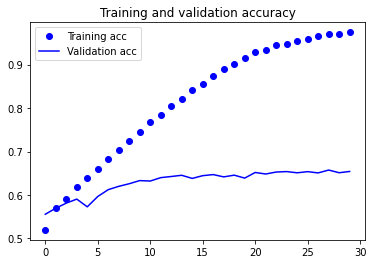

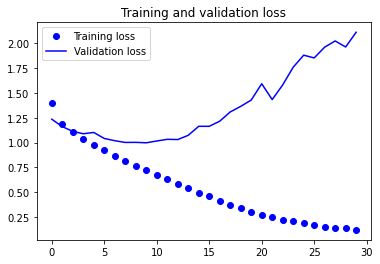

In [42]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.10 (Basic Model + 2 Dense + GLOVE.Twitter, batch size = 128, optimizer = SGD, regularizer implemented)

In [110]:
glove_dir = ''

embeddings_index = {}
f = open('glove.twitter.27B.200d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [113]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 34, 200)           20000000  
_________________________________________________________________
flatten_34 (Flatten)         (None, 6800)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 200)               1360200   
_________________________________________________________________
dense_37 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_24 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 1005      
Total params: 21,401,405
Trainable params: 21,401,405
Non-trainable params: 0
_________________________________________

In [114]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=11,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/11
213/213 [==============================] - 48s 226ms/step - loss: 1.6914 - acc: 0.4231 - val_loss: 1.4952 - val_acc: 0.4960
Epoch 2/11
213/213 [==============================] - 49s 230ms/step - loss: 1.4106 - acc: 0.5294 - val_loss: 1.3371 - val_acc: 0.5516
Epoch 3/11
213/213 [==============================] - 49s 229ms/step - loss: 1.2492 - acc: 0.5884 - val_loss: 1.2565 - val_acc: 0.5802
Epoch 4/11
213/213 [==============================] - 49s 230ms/step - loss: 1.1190 - acc: 0.6420 - val_loss: 1.2092 - val_acc: 0.5930
Epoch 5/11
213/213 [==============================] - 49s 230ms/step - loss: 0.9994 - acc: 0.6939 - val_loss: 1.1772 - val_acc: 0.6087
Epoch 6/11
213/213 [==============================] - 49s 230ms/step - loss: 0.8832 - acc: 0.7388 - val_loss: 1.1608 - val_acc: 0.6172
Epoch 7/11
213/213 [==============================] - 49s 230ms/step - loss: 0.7695 - acc: 0.7882 - val_loss: 1.1749 - val_acc: 0.6257
Epoch 8/11
213/213 [==============================] - 4

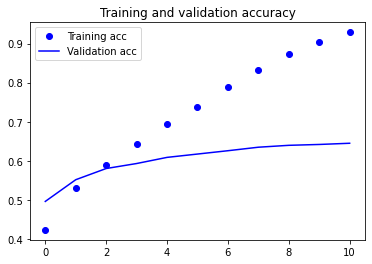

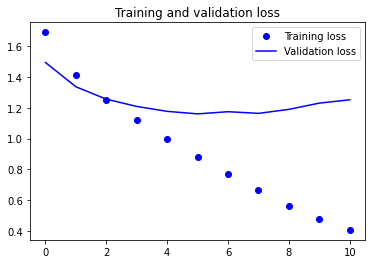

In [115]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [116]:
# Save the Model
model.save('glovetwitter_model.h5')

### Model #2.8 (Basic Model + LSTM + GLOVE.Twitter, batch size = 128, optimizer = SGD, regularizer implemented)

In [10]:
glove_dir = ''

embeddings_index = {}
f = open('glove.twitter.27B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [ ]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

In [ ]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #3.1 (Conv1D)

In [93]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import numpy as np
#training_samples = 20000 # We will be training on 20000 samples
#validation_samples = 5000 # We will be validating on 5000 samples
max_words = 10000 # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)
tokenizer = Tokenizer(num_words=max_words)
# Updates internal vocabulary based on a list of texts.
# In the case where texts contains lists, we assume each entry of the lists to be a token.
tokenizer.fit_on_texts(texts)
# Transforms each text in texts to a sequence of integers.
# Only top num_words-1 most frequent words will be taken into account.
# Only words known by the tokenizer will be taken into account.
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)
X, y = data, to_categorical(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546,)


### 1.3 Data Sampling

In [94]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
# Refer the report Appendix
# Please enter the random_state assigned to your group

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length=max_len))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5, activation='softmax'))

model.summary()



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 34, 128)           1280000   
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 30, 32)            20512     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 2, 32)             5152      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
Total params: 1,305,829
Trainable params: 1,305,829
Non-trainable params: 0
___________________________________________

In [39]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/60
213/213 [==============================] - 2s 11ms/step - loss: 1.4700 - acc: 0.4239 - val_loss: 1.4171 - val_acc: 0.4289
Epoch 2/60
213/213 [==============================] - 2s 10ms/step - loss: 1.3976 - acc: 0.4247 - val_loss: 1.3628 - val_acc: 0.4289
Epoch 3/60
213/213 [==============================] - 2s 10ms/step - loss: 1.3050 - acc: 0.4252 - val_loss: 1.2564 - val_acc: 0.4314
Epoch 4/60
213/213 [==============================] - 2s 10ms/step - loss: 1.2164 - acc: 0.4685 - val_loss: 1.1999 - val_acc: 0.4856
Epoch 5/60
213/213 [==============================] - 2s 10ms/step - loss: 1.1733 - acc: 0.5145 - val_loss: 1.1740 - val_acc: 0.5032
Epoch 6/60
213/213 [==============================] - 2s 10ms/step - loss: 1.1429 - acc: 0.5351 - val_loss: 1.1534 - val_acc: 0.5138
Epoch 7/60
213/213 [==============================] - 2s 10ms/step - loss: 1.1138 - acc: 0.5477 - val_loss: 1.1348 - val_acc: 0.5206
Epoch 8/60
213/213 [==============================] - 2s 10ms/step - 

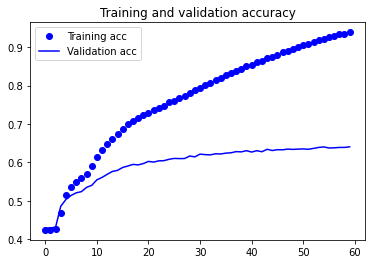

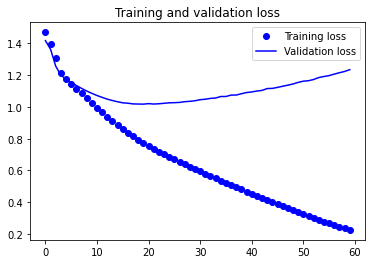

In [40]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #3.2 (Conv1D with number of nodes increased)

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length=max_len))
model.add(layers.Conv1D(2048, 5, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(1024, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5, activation='softmax'))

model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 34, 128)           1280000   
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 30, 2048)          1312768   
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 6, 2048)           0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 2, 1024)           10486784  
_________________________________________________________________
global_max_pooling1d (Global (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 5125      
Total params: 13,084,677
Trainable params: 13,084,677
Non-trainable params: 0
_________________________________________

In [96]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=19,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/19
213/213 [==============================] - 5s 24ms/step - loss: 1.2664 - acc: 0.4515 - val_loss: 1.1474 - val_acc: 0.4965
Epoch 2/19
213/213 [==============================] - 5s 23ms/step - loss: 1.0849 - acc: 0.5391 - val_loss: 1.0744 - val_acc: 0.5474
Epoch 3/19
213/213 [==============================] - 5s 23ms/step - loss: 0.9792 - acc: 0.6040 - val_loss: 1.0198 - val_acc: 0.5843
Epoch 4/19
213/213 [==============================] - 5s 23ms/step - loss: 0.8842 - acc: 0.6503 - val_loss: 0.9912 - val_acc: 0.6006
Epoch 5/19
213/213 [==============================] - 5s 22ms/step - loss: 0.8017 - acc: 0.6922 - val_loss: 0.9813 - val_acc: 0.6108
Epoch 6/19
213/213 [==============================] - 5s 22ms/step - loss: 0.7255 - acc: 0.7289 - val_loss: 0.9789 - val_acc: 0.6132
Epoch 7/19
213/213 [==============================] - 5s 23ms/step - loss: 0.6520 - acc: 0.7622 - val_loss: 0.9931 - val_acc: 0.6231
Epoch 8/19
213/213 [==============================] - 5s 23ms/step - 

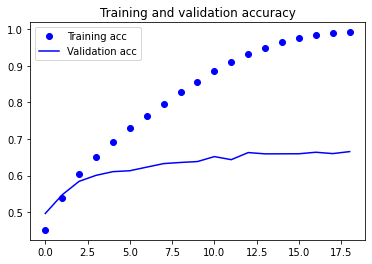

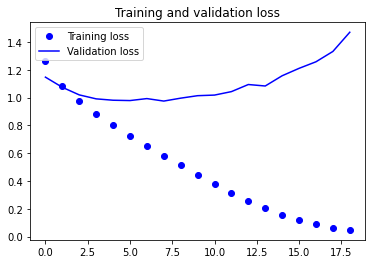

In [97]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [98]:
# Save the Best Model
model.save('conv1d_model.h5')

### Model #3.3 (Conv1D)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length=max_len))
model.add(layers.Conv1D(1024, 5, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(layers.Conv1D(2048, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5, activation='softmax'))

model.summary()


Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 34, 128)           1280000   
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 30, 1024)          656384    
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 6, 1024)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 1024)           0         
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 2, 2048)           10487808  
_________________________________________________________________
global_max_pooling1d_30 (Glo (None, 2048)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 5)               

In [106]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/60
213/213 [==============================] - 4s 18ms/step - loss: 1.3079 - acc: 0.4411 - val_loss: 1.1606 - val_acc: 0.4960
Epoch 2/60
213/213 [==============================] - 4s 18ms/step - loss: 1.0801 - acc: 0.5433 - val_loss: 1.0688 - val_acc: 0.5520
Epoch 3/60
213/213 [==============================] - 4s 18ms/step - loss: 0.9398 - acc: 0.6202 - val_loss: 1.0088 - val_acc: 0.5928
Epoch 4/60
213/213 [==============================] - 4s 18ms/step - loss: 0.8183 - acc: 0.6819 - val_loss: 0.9972 - val_acc: 0.6127
Epoch 5/60
213/213 [==============================] - 4s 18ms/step - loss: 0.7084 - acc: 0.7298 - val_loss: 1.0179 - val_acc: 0.6159
Epoch 6/60
213/213 [==============================] - 4s 18ms/step - loss: 0.6131 - acc: 0.7740 - val_loss: 1.0564 - val_acc: 0.6228
Epoch 7/60
213/213 [==============================] - 4s 18ms/step - loss: 0.5290 - acc: 0.8105 - val_loss: 1.0963 - val_acc: 0.6225
Epoch 8/60
213/213 [==============================] - 4s 18ms/step - 

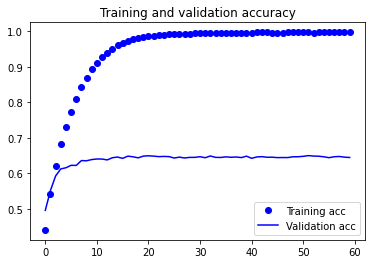

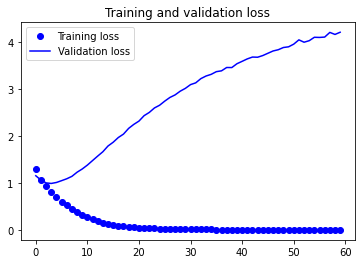

In [107]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #4.1 (Basic Model + cc.en.300.vec, Adam)

In [104]:
embeddings_index = {}
f = open('cc.en.300.vec', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 2000000 word vectors.


In [105]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 34, 300)           30000000  
_________________________________________________________________
flatten_32 (Flatten)         (None, 10200)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 300)               3060300   
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 1505      
Total params: 33,061,805
Trainable params: 33,061,805
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 34, 300)           30000000  
__________________

In [106]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/5
426/426 [==============================] - 135s 317ms/step - loss: 1.1661 - acc: 0.5028 - val_loss: 1.0488 - val_acc: 0.5673
Epoch 2/5
426/426 [==============================] - 135s 317ms/step - loss: 0.9275 - acc: 0.6411 - val_loss: 0.9661 - val_acc: 0.6149
Epoch 3/5
426/426 [==============================] - 137s 321ms/step - loss: 0.7417 - acc: 0.7363 - val_loss: 0.9271 - val_acc: 0.6296
Epoch 4/5
426/426 [==============================] - 141s 331ms/step - loss: 0.5561 - acc: 0.8242 - val_loss: 0.9173 - val_acc: 0.6506
Epoch 5/5
426/426 [==============================] - 140s 329ms/step - loss: 0.3866 - acc: 0.8917 - val_loss: 0.9369 - val_acc: 0.6506


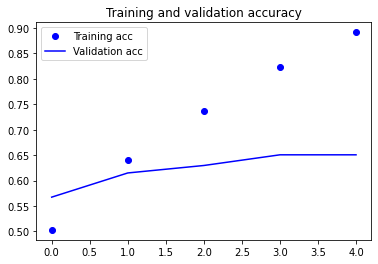

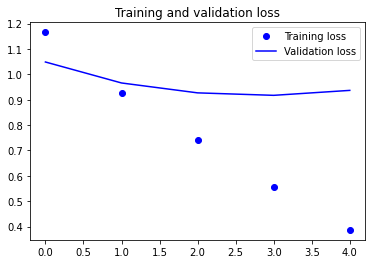

In [107]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [108]:
# Save the Best Model
model.save('fasttext_model.h5')

### Model #4.2 (Basic Model + cc.en.300.vec, RMSprop)

In [17]:
embeddings_index = {}
f = open('cc.en.300.vec', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 2000000 word vectors.


In [23]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 300)           30000000  
_________________________________________________________________
flatten_1 (Flatten)          (None, 10200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               3060300   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1505      
Total params: 33,061,805
Trainable params: 33,061,805
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 300)           30000000  
____________________

In [24]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
213/213 [==============================] - 54s 253ms/step - loss: 1.1916 - acc: 0.4874 - val_loss: 1.1029 - val_acc: 0.5400
Epoch 2/5
213/213 [==============================] - 54s 254ms/step - loss: 1.0189 - acc: 0.5895 - val_loss: 1.0272 - val_acc: 0.5809
Epoch 3/5
213/213 [==============================] - 54s 255ms/step - loss: 0.9219 - acc: 0.6417 - val_loss: 0.9890 - val_acc: 0.5950
Epoch 4/5
213/213 [==============================] - 54s 254ms/step - loss: 0.8426 - acc: 0.6818 - val_loss: 0.9734 - val_acc: 0.6081
Epoch 5/5
213/213 [==============================] - 54s 254ms/step - loss: 0.7706 - acc: 0.7195 - val_loss: 0.9555 - val_acc: 0.6138


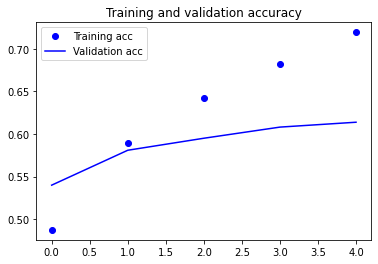

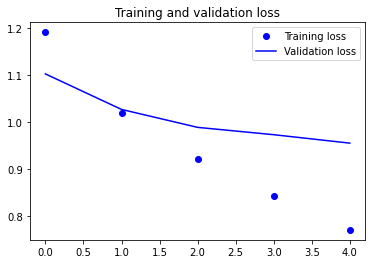

In [25]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #4.3 (Basic Model + cc.en.300.vec, Adam, GRU)

In [17]:
embeddings_index = {}
f = open('cc.en.300.vec', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 2000000 word vectors.


In [31]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(512, return_sequences=True))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 300)           30000000  
_________________________________________________________________
gru_1 (GRU)                  (None, 34, 512)           1250304   
_________________________________________________________________
flatten_3 (Flatten)          (None, 17408)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               5222700   
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1505      
Total params: 36,474,509
Trainable params: 36,474,509
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)        

In [27]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
213/213 [==============================] - 55s 257ms/step - loss: 1.1202 - acc: 0.5208 - val_loss: 1.0239 - val_acc: 0.5784
Epoch 2/5
213/213 [==============================] - 55s 256ms/step - loss: 0.9648 - acc: 0.6059 - val_loss: 1.0215 - val_acc: 0.5855
Epoch 3/5
213/213 [==============================] - 54s 254ms/step - loss: 0.8848 - acc: 0.6490 - val_loss: 0.9507 - val_acc: 0.6130
Epoch 4/5
213/213 [==============================] - 54s 256ms/step - loss: 0.8161 - acc: 0.6807 - val_loss: 0.9352 - val_acc: 0.6222
Epoch 5/5
213/213 [==============================] - 54s 255ms/step - loss: 0.7507 - acc: 0.7103 - val_loss: 0.9298 - val_acc: 0.6294


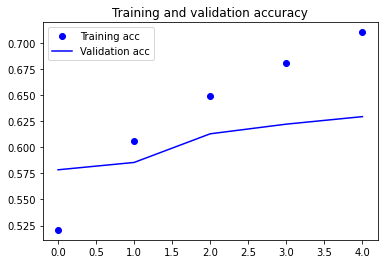

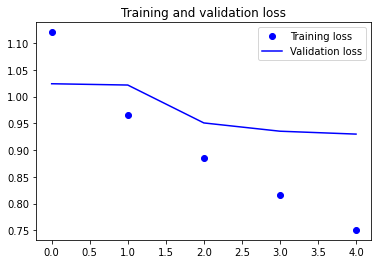

In [28]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #5 (Multilayer CNN)

In [10]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import numpy as np
#training_samples = 20000 # We will be training on 20000 samples
#validation_samples = 5000 # We will be validating on 5000 samples
max_words = 10000 # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)
tokenizer = Tokenizer(num_words=max_words)
# Updates internal vocabulary based on a list of texts.
# In the case where texts contains lists, we assume each entry of the lists to be a token.
tokenizer.fit_on_texts(texts)
# Transforms each text in texts to a sequence of integers.
# Only top num_words-1 most frequent words will be taken into account.
# Only words known by the tokenizer will be taken into account.
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)
X, y = data, to_categorical(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546,)


In [11]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
# Refer the report Appendix
# Please enter the random_state assigned to your group

In [13]:
# Build the Model (Credits: Jason Brownlee)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate

inputs1 = Input(shape=(max_len,))
embedding1 = Embedding(max_words, 100)(inputs1)
conv1 = Conv1D(filters=128, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.25)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

inputs2 = Input(shape=(max_len,))
embedding2 = Embedding(max_words, 100)(inputs2)
conv2 = Conv1D(filters=128, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.25)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

inputs3 = Input(shape=(max_len,))
embedding3 = Embedding(max_words, 100)(inputs3)
conv3 = Conv1D(filters=128, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.25)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

merged = concatenate([flat1, flat2, flat3])

dense1 = Dense(10, activation='relu')(merged)
outputs = Dense(5, activation='softmax')(dense1)
model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 34, 100)      1000000     input_7[0][0]                    
____________________________________________________________________________________________

In [14]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit([X_train, X_train, X_train], y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 6s 29ms/step - loss: 1.4757 - acc: 0.4205 - val_loss: 1.4331 - val_acc: 0.4289
Epoch 2/10
213/213 [==============================] - 6s 29ms/step - loss: 1.3468 - acc: 0.4368 - val_loss: 1.2679 - val_acc: 0.4824
Epoch 3/10
213/213 [==============================] - 6s 29ms/step - loss: 1.1929 - acc: 0.5042 - val_loss: 1.1856 - val_acc: 0.5095
Epoch 4/10
213/213 [==============================] - 6s 29ms/step - loss: 1.1139 - acc: 0.5304 - val_loss: 1.1424 - val_acc: 0.5169
Epoch 5/10
213/213 [==============================] - 6s 29ms/step - loss: 1.0489 - acc: 0.5502 - val_loss: 1.1176 - val_acc: 0.5261
Epoch 6/10
213/213 [==============================] - 6s 29ms/step - loss: 0.9846 - acc: 0.5775 - val_loss: 1.0877 - val_acc: 0.5351
Epoch 7/10
213/213 [==============================] - 6s 29ms/step - loss: 0.9122 - acc: 0.6190 - val_loss: 1.0653 - val_acc: 0.5577
Epoch 8/10
213/213 [==============================] - 6s 29ms/step - 

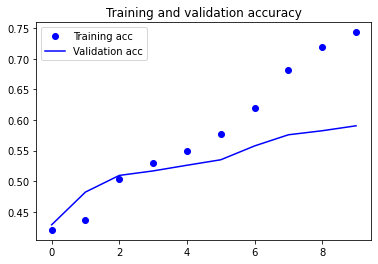

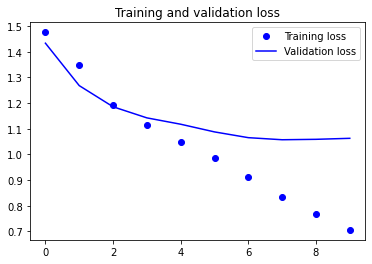

In [15]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# Save the Best Model
model.save('multilayer-cnn_model.h5')

## Step 3 – Evaluate the Model using Testing Data 

In [23]:
# Model #1 (replicate where necessary for other models)
model = models.load_model('basic_GRU.h5')

results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

67/67 [==============================] - 1s 8ms/step - loss: 1.2528 - acc: 0.6166
test loss, test acc: [1.2527891397476196, 0.6165687441825867]


In [25]:
# Model #1 (replicate where necessary for other models)
model = models.load_model('fasttext_model.h5')

results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

67/67 [==============================] - 0s 4ms/step - loss: 0.9219 - acc: 0.6588
test loss, test acc: [0.9218924045562744, 0.6587544083595276]


In [27]:
# Model #1 (replicate where necessary for other models)
model = models.load_model('glovetwitter_model.h5')

results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

67/67 [==============================] - 0s 4ms/step - loss: 1.2449 - acc: 0.6467
test loss, test acc: [1.2448776960372925, 0.6466509699821472]


In [6]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import numpy as np
#training_samples = 20000 # We will be training on 20000 samples
#validation_samples = 5000 # We will be validating on 5000 samples
max_words = 10000 # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)
tokenizer = Tokenizer(num_words=max_words)
# Updates internal vocabulary based on a list of texts.
# In the case where texts contains lists, we assume each entry of the lists to be a token.
tokenizer.fit_on_texts(texts)
# Transforms each text in texts to a sequence of integers.
# Only top num_words-1 most frequent words will be taken into account.
# Only words known by the tokenizer will be taken into account.
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)
X, y = data, to_categorical(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546,)


In [7]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
# Refer the report Appendix
# Please enter the random_state assigned to your group

In [21]:
# Model #1 (replicate where necessary for other models)
model = models.load_model('multilayer-cnn_model.h5')

results = model.evaluate([X_test, X_test, X_test], y_test, batch_size=128)
print("test loss, test acc:", results)

67/67 [==============================] - 0s 5ms/step - loss: 1.0473 - acc: 0.5948
test loss, test acc: [1.0473467111587524, 0.5948296189308167]


In [22]:
# Model #1 (replicate where necessary for other models)
model = models.load_model('conv1d_model.h5')

results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

67/67 [==============================] - 0s 7ms/step - loss: 1.4630 - acc: 0.6689
test loss, test acc: [1.4630076885223389, 0.668860137462616]


In [23]:
# Save the Best Model
model.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction

In [8]:
model = models.load_model('text_model_best.h5')

In [32]:
# takes the user input
text_input = np.array([input()])

photography


In [33]:
# convert the user input into numeric tensor
import pandas as pd
def prediction(model, text_array, items_list):
    prob = model.predict(data)
    pro_df = pd.DataFrame(prob, columns = items_list)
    result = items_list[np.argmax(prob)]
    return pro_df, result

sequences = tokenizer.texts_to_sequences(text_input)
data = pad_sequences(sequences, maxlen=max_len)

In [34]:
# show the model output using predict function
prediction(model, data, emoji_dictionary)

(          0         1         2         3         4
 0  0.061116  0.008719  0.522213  0.049756  0.358195,
 '📷')